In [12]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import math
from sklearn.preprocessing import normalize
from IPython import display
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [206]:
Xp = np.genfromtxt("X.csv", delimiter = ",")
y = np.genfromtxt("y.csv", delimiter = ",")
y[0:500] = 0
X = np.zeros((5000,1,20,20))
X = np.reshape(Xp, (5000,1,20,20))
X = np.rot90(X,k = 1, axes = (2,3))
X = np.flip(X, 2)

print(X.shape)
print(y.shape)

(5000, 1, 20, 20)
(5000,)


In [207]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X ,y , test_size = 0.25, random_state = 42)

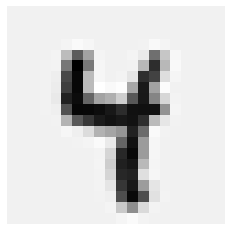

In [209]:
img = Xtrain[2839,0,:,:]
plt.imshow(img, cmap = "binary")
plt.axis("off")
plt.show()

In [210]:
Xtrain = torch.tensor(Xtrain).to(device)
ytrain = torch.tensor(ytrain).to(device)
Xtest = torch.tensor(Xtest).to(device)
ytest = torch.tensor(ytest).to(device)


In [276]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 5, 1)
        self.conv2 = nn.Conv2d(10, 20, 5, 1)
        self.fc1 = nn.Linear(80, 200)
        self.fc2 = nn.Linear(200, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1,80)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim = 1)
        return x
        

In [277]:
model = Net()

learning_rate = 1e-3
lambda_l2 = 1e-5

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=lambda_l2)

epochs = 1000

for i in range(epochs):
    y_pred = model(Xtrain.float())
    loss = criterion(y_pred, ytrain.long())
    score, predicted = torch.max(y_pred, 1) 
    acc = (ytrain == predicted).sum().float() / len(ytrain)
    display.clear_output(wait=True)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (i, loss.item(), acc))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  

[EPOCH]: 999, [LOSS]: 1.470966, [ACCURACY]: 0.990


In [278]:
y_t = model(Xtest.float())
score, predicted = torch.max(y_t, 1) 
acc = (ytest == predicted).sum().float() / len(ytest)
print(f"Accuracy on test set is {acc}")

Accuracy on test set is 0.9639999866485596


[INFO]...
  the number with 0.9999960660934448 probabality is 9.



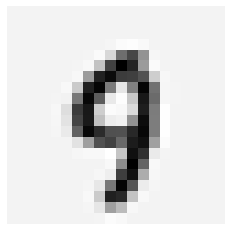

In [321]:
index = 88
a = np.zeros((1,1,20,20))
a[0,:,:,:] = Xtest[index,:,:,:].numpy()
a = torch.tensor(a)
arg = torch.argmax(model(a.float()))
prb = torch.max(model(a.float()))
print("[INFO]...")
print(f"  the number with {prb} probabality is {arg}.")
print()
img = np.reshape(Xtest[index,:], (20,20))
plt.imshow(img, cmap = "binary")
plt.axis("off")
plt.show()